In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('questions.csv')

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.shape

(404351, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
107975,107975,214139,214140,How do you take suicide the fastest way?,Flyovers in India take 2-3 years for completio...,0
288743,288743,567385,567386,Is there something that travels faster than li...,Is there something that can travel faster than...,1
363118,363118,710869,710870,Which is a best book for partial differential ...,Which book is good for really understanding pa...,1
386647,386647,755954,755955,What is shear loading?,What is shear?,0
54504,54504,108455,108456,What are the best colleges for Electrical Engi...,What are some good colleges for Electrical Eng...,1


In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
df = df.dropna()
df.shape

(404348, 6)

In [11]:
df.duplicated().sum()

0

In [12]:
df['is_duplicate'].value_counts()

is_duplicate
0    255042
1    149306
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

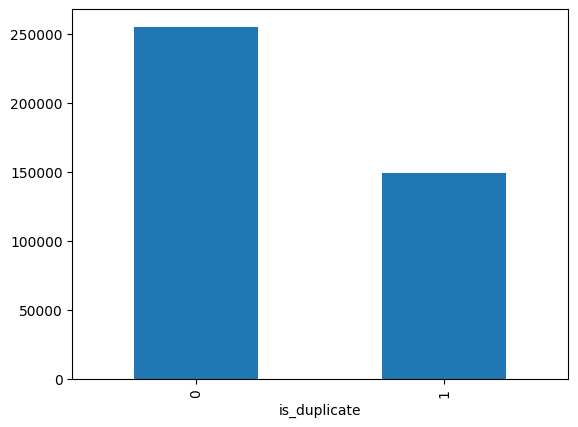

In [13]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of Unique Questions :', np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions getting repeated :', x[x].shape[0])

Number of Unique Questions : 789795
Number of questions getting repeated : 13698


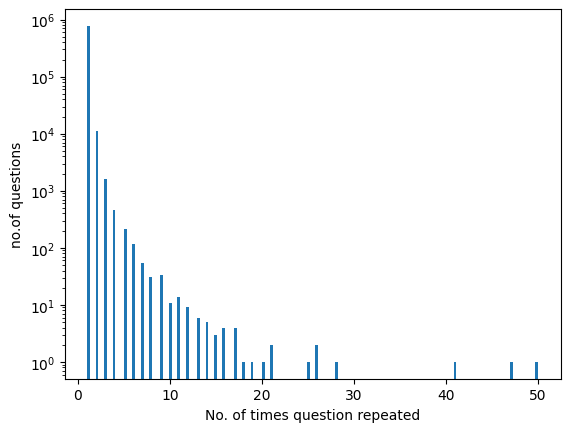

In [15]:
plt.hist(qid.value_counts().values, bins = 160)
plt.xlabel('No. of times question repeated')
plt.ylabel('no.of questions')
plt.yscale('log')
plt.show()

### Feature Engineering

In [16]:
df['q1_length']= df['question1'].str.len()
df['q2_length']= df['question2'].str.len()

In [17]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88


In [18]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))

In [19]:
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [20]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13


In [21]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    return len(w1&w2)

In [22]:
df['word_common'] = df.apply(common_words, axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4


In [23]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [24]:
df['word_total'] = df.apply(total_words, axis = 1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20


In [25]:
df['word_share'] = round(df['word_common']/df['word_total'], 2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20


#### Analysis of features

C:\Users\User\AppData\Local\Temp\ipykernel_6792\2429783073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['q1_length'])


mimimum characters : 1
maximum characters : 623
average num of characters : 59


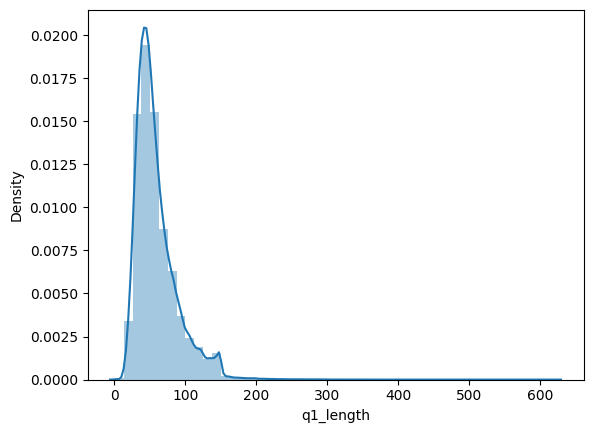

In [26]:
sns.distplot(df['q1_length'])
print('mimimum characters :', df['q1_length'].min())
print('maximum characters :', df['q1_length'].max())
print('average num of characters :', int(df['q1_length'].mean()))


C:\Users\User\AppData\Local\Temp\ipykernel_6792\3426645103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['q2_length'])


mimimum characters : 1
maximum characters : 1169
average num of characters : 60


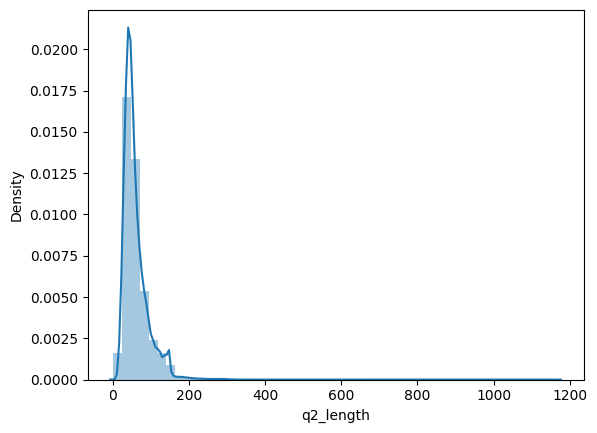

In [27]:
sns.distplot(df['q2_length'])
print('mimimum characters :', df['q2_length'].min())
print('maximum characters :', df['q2_length'].max())
print('average num of characters :', int(df['q2_length'].mean()))


C:\Users\User\AppData\Local\Temp\ipykernel_6792\1011358701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['q1_num_words'])


mimimum words : 1
maximum words : 125
average num of words : 10


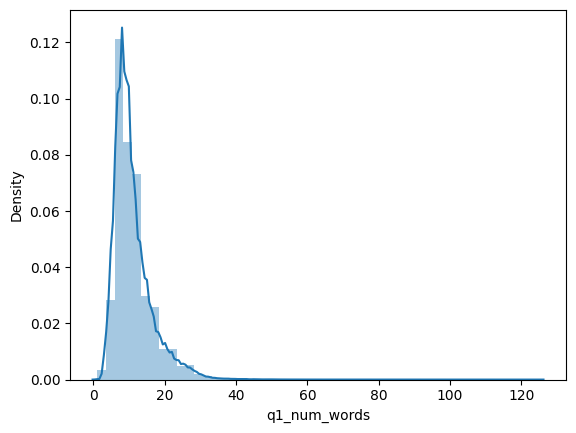

In [28]:

sns.distplot(df['q1_num_words'])
print('mimimum words :', df['q1_num_words'].min())
print('maximum words :', df['q1_num_words'].max())
print('average num of words :', int(df['q1_num_words'].mean()))



C:\Users\User\AppData\Local\Temp\ipykernel_6792\4096723754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['q2_num_words'])


mimimum words : 1
maximum words : 237
average num of words : 11


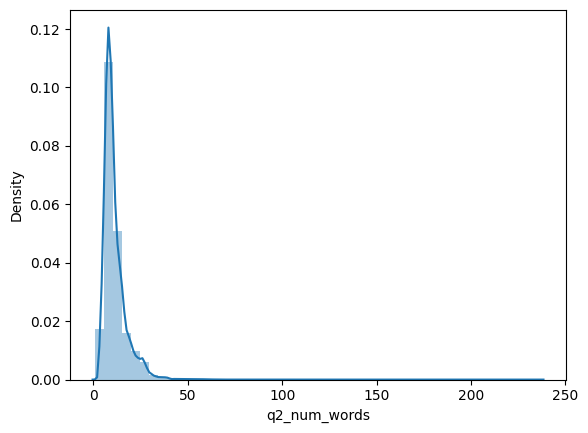

In [29]:

sns.distplot(df['q2_num_words'])
print('mimimum words :', df['q2_num_words'].min())
print('maximum words :', df['q2_num_words'].max())
print('average num of words :', int(df['q2_num_words'].mean()))


C:\Users\User\AppData\Local\Temp\ipykernel_6792\3278063495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label = 'non-duplicate')
C:\Users\User\AppData\Local\Temp\ipykernel_6792\3278063495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df

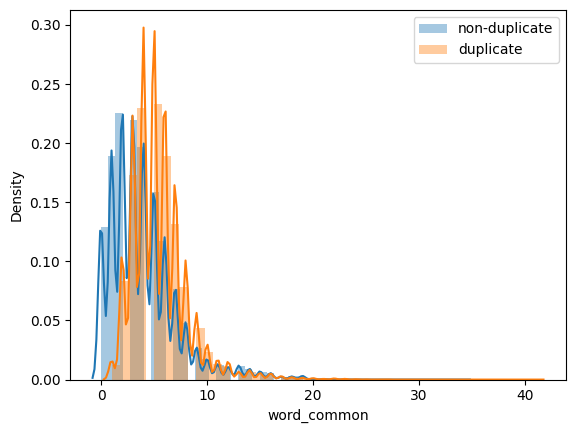

In [30]:
# Common words 
sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label = 'non-duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'], label = 'duplicate')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6792\2823847177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_total'], label = 'non-duplicate')
C:\Users\User\AppData\Local\Temp\ipykernel_6792\2823847177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[

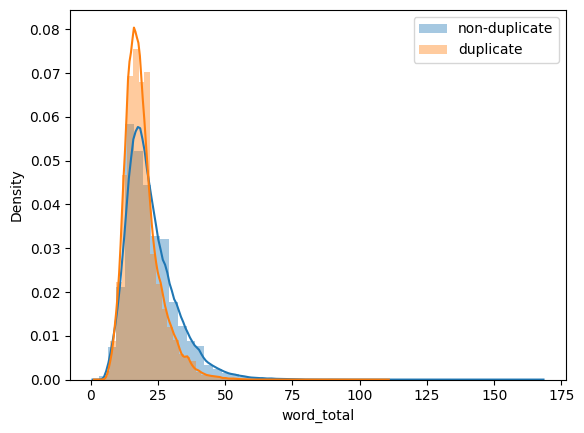

In [31]:
# Common words 
sns.distplot(df[df['is_duplicate'] == 0]['word_total'], label = 'non-duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'], label = 'duplicate')
plt.legend()
plt.show()

In [32]:
df1 = df[['question1', 'question2', 'is_duplicate']]
df1.head(2)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [33]:
final_df = df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])
final_df.shape

(404348, 8)

In [34]:
final_df.head(2)

,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,66,57,14,12,10,23,0.43
1,0,51,88,8,13,4,20,0.20


### Bag of Words with preprocessing and advanced features

In [35]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [36]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [69]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [38]:
df1['question1'] = df1['question1'].apply(preprocess)
df1['question2'] = df1['question2'].apply(preprocess)

In [39]:
df1['question1'][0]

'what is the step by step guide to invest in share market in india'

In [40]:
df['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [41]:
df1['q1_len'] = df1['question1'].str.len()
df1['q2_len'] = df1['question2'].str.len()

In [42]:
df1['q1_num_words'] = df1['question1'].apply(lambda row: len(row.split(" ")))
df1['q2_num_words'] = df1['question2'].apply(lambda row: len(row.split(" ")))

In [43]:
df1.head(2)

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17


In [44]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [45]:
df1['word_common'] = df1.apply(common_words, axis=1)
df1.head(2)

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8


In [46]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [47]:
df1['word_total'] = df1.apply(total_words, axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20


In [48]:
df1['word_share']  = round(df1['word_common']/df1['word_total'], 2)

In [49]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,word_common,word_total,word_share
334067,334067,655015,655016,What is the corporate culture like at Kosmos E...,What is the corporate culture like at SM Energ...,0,103,99,17,17,13,28,0.46
369169,369169,722470,722471,Which are the best universities in India to do...,Which is the best university in India to do M....,1,76,72,13,13,9,24,0.38
219931,219931,433574,433575,What is your review of Jawaharlal Nehru Techno...,What is your review of Jawaharlal Nehru Techno...,0,72,76,10,10,8,20,0.40
37153,37153,74027,74028,What is it like working with Japanese people?,Are Japanese people hardworking?,0,45,32,8,4,1,12,0.08
346037,346037,678100,678101,What should I do if I am hungry?,What should I eat when I am not hungry?,0,32,39,8,9,5,15,0.33


In [50]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [51]:
token_features = df1.apply(fetch_token_features, axis=1)

df1["cwc_min"]       = list(map(lambda x: x[0], token_features))
df1["cwc_max"]       = list(map(lambda x: x[1], token_features))
df1["csc_min"]       = list(map(lambda x: x[2], token_features))
df1["csc_max"]       = list(map(lambda x: x[3], token_features))
df1["ctc_min"]       = list(map(lambda x: x[4], token_features))
df1["ctc_max"]       = list(map(lambda x: x[5], token_features))
df1["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df1["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [52]:
df1.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21,0.19,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


### Fuzzy Features

In [53]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [55]:
fuzzy_features = df1.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df1['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df1['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df1['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df1['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [56]:
print(df1.shape)
df1.head(2)

(404348, 22)


,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48,...,0.999983,0.999983,0.916659,0.785709,0.0,1.0,93,100,93,100
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31,...,0.749981,0.599988,0.699993,0.466664,0.0,1.0,66,74,63,86


In [57]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df1[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq'   , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' ]])
y = df1['is_duplicate'].values

In [58]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404348 samples in 1.348s...
[t-SNE] Computed neighbors for 404348 samples in 169.909s...
[t-SNE] Computed conditional probabilities for sample 1000 / 404348
[t-SNE] Computed conditional probabilities for sample 2000 / 404348
[t-SNE] Computed conditional probabilities for sample 3000 / 404348
[t-SNE] Computed conditional probabilities for sample 4000 / 404348
[t-SNE] Computed conditional probabilities for sample 5000 / 404348
[t-SNE] Computed conditional probabilities for sample 6000 / 404348
[t-SNE] Computed conditional probabilities for sample 7000 / 404348
[t-SNE] Computed conditional probabilities for sample 8000 / 404348
[t-SNE] Computed conditional probabilities for sample 9000 / 404348
[t-SNE] Computed conditional probabilities for sample 10000 / 404348
[t-SNE] Computed conditional probabilities for sample 11000 / 404348
[t-SNE] Computed conditional probabilities for sample 12000 / 404348
[t-SNE] Computed conditional proba

In [59]:
ques_df = df1[['question1', 'question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [60]:
final_df = df1.drop(columns = ['question1', 'question2'])
print(final_df.shape)
final_df.head()

(404348, 20)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,93,100,93,100
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,66,74,63,86
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,43,46,63,63
3,0,49,58,12,16,1,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9,11,25,28
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,35,55,47,67


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [62]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(404348, 6000)

In [63]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(404348, 6020)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0,0,0,0,0,0,0,0,0,0
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,0,0,0,0,0,0,0,0,0,0
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,49,58,12,16,1,22,0.05,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8326078892048967

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8048225547174478